In [3]:
spark.stop()

In [4]:
from pyspark.sql import SparkSession
SparkSession.builder.master("local[*]").getOrCreate()

24/08/14 10:25:30 WARN Utils: Your hostname, nooman resolves to a loopback address: 127.0.1.1; using 192.168.15.103 instead (on interface enp4s0)
24/08/14 10:25:30 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/08/14 10:25:31 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession \
        .builder \
        .appName("Spark with log data") \
        .master("local[*]") \
        .config("spark.executor.memory", "1g") \
        .config("spark.executor.cores", "2") \
        .config("spark.executor.instances", "4") \
        .config("spark.driver.memory", "1g") \
        .config("spark.driver.cores", "2") \
        .getOrCreate()

In [5]:
import re
import pandas as pd

In [7]:
df = spark.read.text("/Nasalogdata")

In [8]:
df.count()

1569898

In [9]:
df.rdd.getNumPartitions()

8

In [10]:
df.show(5, truncate=False)

+--------------------------------------------------------------------------------------------------------------------------+
|value                                                                                                                     |
+--------------------------------------------------------------------------------------------------------------------------+
|in24.inetnebr.com - - [01/Aug/1995:00:00:01 -0400] "GET /shuttle/missions/sts-68/news/sts-68-mcc-05.txt HTTP/1.0" 200 1839|
|uplherc.upl.com - - [01/Aug/1995:00:00:07 -0400] "GET / HTTP/1.0" 304 0                                                   |
|uplherc.upl.com - - [01/Aug/1995:00:00:08 -0400] "GET /images/ksclogo-medium.gif HTTP/1.0" 304 0                          |
|uplherc.upl.com - - [01/Aug/1995:00:00:08 -0400] "GET /images/MOSAIC-logosmall.gif HTTP/1.0" 304 0                        |
|uplherc.upl.com - - [01/Aug/1995:00:00:08 -0400] "GET /images/USA-logosmall.gif HTTP/1.0" 304 0                           |


In [11]:
rdd = df.rdd

In [12]:
rdd.take(10)

[Row(value='in24.inetnebr.com - - [01/Aug/1995:00:00:01 -0400] "GET /shuttle/missions/sts-68/news/sts-68-mcc-05.txt HTTP/1.0" 200 1839'),
 Row(value='uplherc.upl.com - - [01/Aug/1995:00:00:07 -0400] "GET / HTTP/1.0" 304 0'),
 Row(value='uplherc.upl.com - - [01/Aug/1995:00:00:08 -0400] "GET /images/ksclogo-medium.gif HTTP/1.0" 304 0'),
 Row(value='uplherc.upl.com - - [01/Aug/1995:00:00:08 -0400] "GET /images/MOSAIC-logosmall.gif HTTP/1.0" 304 0'),
 Row(value='uplherc.upl.com - - [01/Aug/1995:00:00:08 -0400] "GET /images/USA-logosmall.gif HTTP/1.0" 304 0'),
 Row(value='ix-esc-ca2-07.ix.netcom.com - - [01/Aug/1995:00:00:09 -0400] "GET /images/launch-logo.gif HTTP/1.0" 200 1713'),
 Row(value='uplherc.upl.com - - [01/Aug/1995:00:00:10 -0400] "GET /images/WORLD-logosmall.gif HTTP/1.0" 304 0'),
 Row(value='slppp6.intermind.net - - [01/Aug/1995:00:00:10 -0400] "GET /history/skylab/skylab.html HTTP/1.0" 200 1687'),
 Row(value='piweba4y.prodigy.com - - [01/Aug/1995:00:00:10 -0400] "GET /images/l

In [13]:
sample_logs = [item["value"] for item in df.take(10)]
sample_logs

['in24.inetnebr.com - - [01/Aug/1995:00:00:01 -0400] "GET /shuttle/missions/sts-68/news/sts-68-mcc-05.txt HTTP/1.0" 200 1839',
 'uplherc.upl.com - - [01/Aug/1995:00:00:07 -0400] "GET / HTTP/1.0" 304 0',
 'uplherc.upl.com - - [01/Aug/1995:00:00:08 -0400] "GET /images/ksclogo-medium.gif HTTP/1.0" 304 0',
 'uplherc.upl.com - - [01/Aug/1995:00:00:08 -0400] "GET /images/MOSAIC-logosmall.gif HTTP/1.0" 304 0',
 'uplherc.upl.com - - [01/Aug/1995:00:00:08 -0400] "GET /images/USA-logosmall.gif HTTP/1.0" 304 0',
 'ix-esc-ca2-07.ix.netcom.com - - [01/Aug/1995:00:00:09 -0400] "GET /images/launch-logo.gif HTTP/1.0" 200 1713',
 'uplherc.upl.com - - [01/Aug/1995:00:00:10 -0400] "GET /images/WORLD-logosmall.gif HTTP/1.0" 304 0',
 'slppp6.intermind.net - - [01/Aug/1995:00:00:10 -0400] "GET /history/skylab/skylab.html HTTP/1.0" 200 1687',
 'piweba4y.prodigy.com - - [01/Aug/1995:00:00:10 -0400] "GET /images/launchmedium.gif HTTP/1.0" 200 11853',
 'slppp6.intermind.net - - [01/Aug/1995:00:00:11 -0400] "GET

#### Extracting Hostname

In [14]:
host_pattern = r'(^\S+\.[\S+\.]+\S+)\s'
hosts = [re.search(host_pattern, item).group(1) if re.search(host_pattern, item) else
         "no host" for item in sample_logs]
hosts

['in24.inetnebr.com',
 'uplherc.upl.com',
 'uplherc.upl.com',
 'uplherc.upl.com',
 'uplherc.upl.com',
 'ix-esc-ca2-07.ix.netcom.com',
 'uplherc.upl.com',
 'slppp6.intermind.net',
 'piweba4y.prodigy.com',
 'slppp6.intermind.net']

#### Extracting Time stamp

In [15]:
ts_pattern = r'\[(\d{2}/\w{3}/\d{4}:\d{2}:\d{2}:\d{2} -\d{4})]'
timestamps = [re.search(ts_pattern, item).group(1) for item in sample_logs]
timestamps

['01/Aug/1995:00:00:01 -0400',
 '01/Aug/1995:00:00:07 -0400',
 '01/Aug/1995:00:00:08 -0400',
 '01/Aug/1995:00:00:08 -0400',
 '01/Aug/1995:00:00:08 -0400',
 '01/Aug/1995:00:00:09 -0400',
 '01/Aug/1995:00:00:10 -0400',
 '01/Aug/1995:00:00:10 -0400',
 '01/Aug/1995:00:00:10 -0400',
 '01/Aug/1995:00:00:11 -0400']

#### Extracting Protocol

In [16]:
method_uri_protocol_pattern = r'\"(\S+)\s(\S+)\s*(\S*)\"'
method_uri_protocol = [re.search(method_uri_protocol_pattern, item).groups()
                       if re.search(method_uri_protocol_pattern, item)
                       else "no uri"
                       for item in sample_logs]
method_uri_protocol

[('GET', '/shuttle/missions/sts-68/news/sts-68-mcc-05.txt', 'HTTP/1.0'),
 ('GET', '/', 'HTTP/1.0'),
 ('GET', '/images/ksclogo-medium.gif', 'HTTP/1.0'),
 ('GET', '/images/MOSAIC-logosmall.gif', 'HTTP/1.0'),
 ('GET', '/images/USA-logosmall.gif', 'HTTP/1.0'),
 ('GET', '/images/launch-logo.gif', 'HTTP/1.0'),
 ('GET', '/images/WORLD-logosmall.gif', 'HTTP/1.0'),
 ('GET', '/history/skylab/skylab.html', 'HTTP/1.0'),
 ('GET', '/images/launchmedium.gif', 'HTTP/1.0'),
 ('GET', '/history/skylab/skylab-small.gif', 'HTTP/1.0')]

##### Extrating HTTP Status Code

In [17]:
status_pattern = r'\s(\d{3})\s'
status = [re.search(status_pattern, item).group(1) for item in sample_logs]
status

['200', '304', '304', '304', '304', '200', '304', '200', '200', '200']

#### Extracting Content Size

In [18]:
contentsize_pattern = r'\s(\d+)$'
content_size = [re.search(contentsize_pattern, item).group(1) for item in sample_logs]
content_size

['1839', '0', '0', '0', '0', '1713', '0', '1687', '11853', '9202']

In [19]:
from pyspark.sql.functions import regexp_extract

log_df = df.select(regexp_extract('value', host_pattern, 1).alias('host'),
                   regexp_extract('value', ts_pattern, 1).alias('TimeStamp'),
                   regexp_extract('value', method_uri_protocol_pattern, 1).alias("method"),
                   regexp_extract('value', method_uri_protocol_pattern, 2).alias("uri"),
                   regexp_extract('value', method_uri_protocol_pattern, 3).alias("protocol"),
                   regexp_extract('value', status_pattern, 1).alias('status'),
                   regexp_extract('value', contentsize_pattern, 1).alias('content_size')
)
log_df.show(10, truncate=True)

+--------------------+--------------------+------+--------------------+--------+------+------------+
|                host|           TimeStamp|method|                 uri|protocol|status|content_size|
+--------------------+--------------------+------+--------------------+--------+------+------------+
|   in24.inetnebr.com|01/Aug/1995:00:00...|   GET|/shuttle/missions...|HTTP/1.0|   200|        1839|
|     uplherc.upl.com|01/Aug/1995:00:00...|   GET|                   /|HTTP/1.0|   304|           0|
|     uplherc.upl.com|01/Aug/1995:00:00...|   GET|/images/ksclogo-m...|HTTP/1.0|   304|           0|
|     uplherc.upl.com|01/Aug/1995:00:00...|   GET|/images/MOSAIC-lo...|HTTP/1.0|   304|           0|
|     uplherc.upl.com|01/Aug/1995:00:00...|   GET|/images/USA-logos...|HTTP/1.0|   304|           0|
|ix-esc-ca2-07.ix....|01/Aug/1995:00:00...|   GET|/images/launch-lo...|HTTP/1.0|   200|        1713|
|     uplherc.upl.com|01/Aug/1995:00:00...|   GET|/images/WORLD-log...|HTTP/1.0|   304|    

In [20]:
df.filter(df["value"].isNull()).count()

0

In [21]:
bad_rows_df = log_df.filter(log_df["host"].isNull() |
                            log_df["method"].isNull() |
                            log_df["TimeStamp"].isNull() |
                            log_df["uri"].isNull() |
                            log_df["status"].isNull() |
                            log_df["content_size"].isNull()
                       )
bad_rows_df.count()

0

In [22]:
log_df.printSchema()

root
 |-- host: string (nullable = true)
 |-- TimeStamp: string (nullable = true)
 |-- method: string (nullable = true)
 |-- uri: string (nullable = true)
 |-- protocol: string (nullable = true)
 |-- status: string (nullable = true)
 |-- content_size: string (nullable = true)



In [23]:
log_df.show(10)

+--------------------+--------------------+------+--------------------+--------+------+------------+
|                host|           TimeStamp|method|                 uri|protocol|status|content_size|
+--------------------+--------------------+------+--------------------+--------+------+------------+
|   in24.inetnebr.com|01/Aug/1995:00:00...|   GET|/shuttle/missions...|HTTP/1.0|   200|        1839|
|     uplherc.upl.com|01/Aug/1995:00:00...|   GET|                   /|HTTP/1.0|   304|           0|
|     uplherc.upl.com|01/Aug/1995:00:00...|   GET|/images/ksclogo-m...|HTTP/1.0|   304|           0|
|     uplherc.upl.com|01/Aug/1995:00:00...|   GET|/images/MOSAIC-lo...|HTTP/1.0|   304|           0|
|     uplherc.upl.com|01/Aug/1995:00:00...|   GET|/images/USA-logos...|HTTP/1.0|   304|           0|
|ix-esc-ca2-07.ix....|01/Aug/1995:00:00...|   GET|/images/launch-lo...|HTTP/1.0|   200|        1713|
|     uplherc.upl.com|01/Aug/1995:00:00...|   GET|/images/WORLD-log...|HTTP/1.0|   304|    

In [24]:
log_df.select("TimeStamp").show(5, truncate=False)

+--------------------------+
|TimeStamp                 |
+--------------------------+
|01/Aug/1995:00:00:01 -0400|
|01/Aug/1995:00:00:07 -0400|
|01/Aug/1995:00:00:08 -0400|
|01/Aug/1995:00:00:08 -0400|
|01/Aug/1995:00:00:08 -0400|
+--------------------------+
only showing top 5 rows



In [25]:
from pyspark.sql.functions import udf
month_map = {
    "Jan" : 1, "Feb" : 2, "March" : 3, "April" : 4, "May" : 5, "June" : 6, "July" : 7, "Aug" : 8, "Sep" : 9,
    "Oct" : 10, "Nov" : 11, "Dec" : 12
}

def parse_clf_time(text):
    return f"{int(text[7:11]):04d}-{int(month_map[text[3:6]]):02d}-{int(text[:2]):02d} {int(text[12:14]):02d}:{int(text[15:17]):02d}:{int(text[18:21]):02d}"

parse_clf_time("01/Aug/1995:00:00:08 -0400")

'1995-08-01 00:00:08'

In [26]:
udf_parse_time = udf(parse_clf_time)

log_df = log_df.select("*", udf_parse_time(log_df["TimeStamp"]).cast("timestamp").alias("time")).drop('timestamp')
log_df.show(5)

+-----------------+------+--------------------+--------+------+------------+-------------------+
|             host|method|                 uri|protocol|status|content_size|               time|
+-----------------+------+--------------------+--------+------+------------+-------------------+
|in24.inetnebr.com|   GET|/shuttle/missions...|HTTP/1.0|   200|        1839|1995-08-01 00:00:01|
|  uplherc.upl.com|   GET|                   /|HTTP/1.0|   304|           0|1995-08-01 00:00:07|
|  uplherc.upl.com|   GET|/images/ksclogo-m...|HTTP/1.0|   304|           0|1995-08-01 00:00:08|
|  uplherc.upl.com|   GET|/images/MOSAIC-lo...|HTTP/1.0|   304|           0|1995-08-01 00:00:08|
|  uplherc.upl.com|   GET|/images/USA-logos...|HTTP/1.0|   304|           0|1995-08-01 00:00:08|
+-----------------+------+--------------------+--------+------+------------+-------------------+
only showing top 5 rows



In [27]:
log_df.printSchema()

root
 |-- host: string (nullable = true)
 |-- method: string (nullable = true)
 |-- uri: string (nullable = true)
 |-- protocol: string (nullable = true)
 |-- status: string (nullable = true)
 |-- content_size: string (nullable = true)
 |-- time: timestamp (nullable = true)



In [28]:
log_df.cache()

DataFrame[host: string, method: string, uri: string, protocol: string, status: string, content_size: string, time: timestamp]

In [29]:
log_df.describe(["content_size"]).show()

+-------+-----------------+
|summary|     content_size|
+-------+-----------------+
|  count|          1569898|
|   mean| 17244.9678759674|
| stddev|68244.03865948365|
|    min|                 |
|    max|            99981|
+-------+-----------------+



In [35]:
from pyspark.sql import functions as f
log_df.select(
    f.min(log_df["content_size"]).alias("min_content_size"),
    f.max(log_df["content_size"]).alias("max_content_size"),
    f.mean(log_df["content_size"]).alias("mean_content_size"),
    f.stddev(log_df["content_size"]).alias("std_content_size"),
    f.count(log_df["content_size"]).alias("count_content_size")
).show()

+----------------+----------------+-----------------+-----------------+------------------+
|min_content_size|max_content_size|mean_content_size| std_content_size|count_content_size|
+----------------+----------------+-----------------+-----------------+------------------+
|                |           99981| 17244.9678759674|68244.03865948365|           1569898|
+----------------+----------------+-----------------+-----------------+------------------+



In [38]:
status_frequency = log_df.groupby("status").count()

In [41]:
status_frequency.count()

8

In [46]:
status_frequency = status_frequency.toPandas().sort_values(by="count", ascending=False)

In [52]:
status_frequency["status"]

0    200
4    304
1    302
2    404
3    403
6    501
7    400
5    500
Name: status, dtype: object

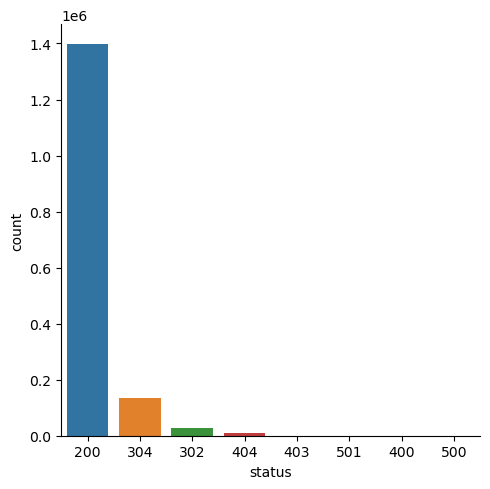

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(data=status_frequency, x="status", y="count", kind="bar",
           order=status_frequency["status"])
plt.show()

In [59]:
import numpy as np
status_frequency["log(count"] = np.log(status_frequency["count"])

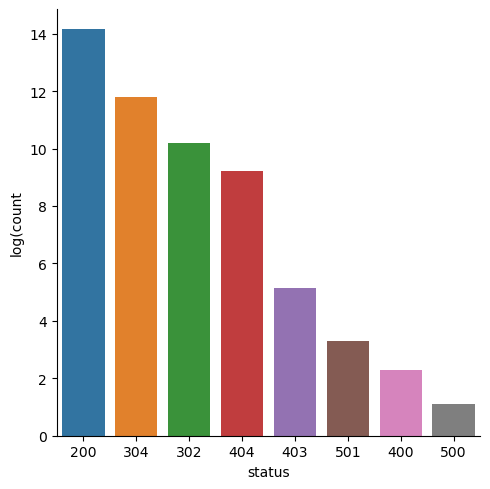

In [61]:
sns.catplot(data=status_frequency, x="status", y="log(count", kind="bar",
           order=status_frequency["status"])
plt.show()

In [65]:
"""Top 20 hosts"""
log_df.groupby("host").count().sort('count', ascending=False).limit(20).show()

+--------------------+-----+
|                host|count|
+--------------------+-----+
|  edams.ksc.nasa.gov| 6530|
|piweba4y.prodigy.com| 4846|
|        163.206.89.4| 4791|
|piweba5y.prodigy.com| 4607|
|piweba3y.prodigy.com| 4416|
|www-d1.proxy.aol.com| 3889|
|www-b2.proxy.aol.com| 3534|
|www-b3.proxy.aol.com| 3463|
|www-c5.proxy.aol.com| 3423|
|www-b5.proxy.aol.com| 3411|
|www-c2.proxy.aol.com| 3407|
|www-d2.proxy.aol.com| 3404|
|www-a2.proxy.aol.com| 3337|
|         news.ti.com| 3298|
|www-d3.proxy.aol.com| 3296|
|www-b4.proxy.aol.com| 3293|
|www-c3.proxy.aol.com| 3272|
|www-d4.proxy.aol.com| 3234|
|www-c1.proxy.aol.com| 3177|
|www-c4.proxy.aol.com| 3134|
+--------------------+-----+



In [69]:
"""Method Count"""
log_df.groupby("method").count().show()

+---------------+-------+
|         method|  count|
+---------------+-------+
|           POST|    111|
|           HEAD|   3965|
|            GET|1564929|
|               |    891|
|�|t�9ð'À|u|      2|
+---------------+-------+



In [74]:
"""Top 20 End Point"""
log_df.groupby("uri").count().sort("count", ascending=False).limit(20).show()

+--------------------+-----+
|                 uri|count|
+--------------------+-----+
|/images/NASA-logo...|97384|
|/images/KSC-logos...|75332|
|/images/MOSAIC-lo...|67441|
|/images/USA-logos...|67061|
|/images/WORLD-log...|66437|
|/images/ksclogo-m...|62771|
|           /ksc.html|43683|
|/history/apollo/i...|37824|
|/images/launch-lo...|35135|
|                   /|30328|
|/images/ksclogosm...|27808|
|/shuttle/missions...|24606|
| /shuttle/countdown/|24458|
|/shuttle/missions...|24381|
|/shuttle/missions...|23404|
|/shuttle/missions...|22451|
|/images/launchmed...|19875|
|  /htbin/cdt_main.pl|17245|
|/shuttle/countdow...|12158|
|     /icons/menu.xbm|12137|
+--------------------+-----+



In [78]:
not200_df = log_df.filter(log_df["status"] != 200)
not200_df.groupby("uri").count().sort("count", ascending=False).limit(20).show()

+--------------------+-----+
|                 uri|count|
+--------------------+-----+
|/images/NASA-logo...|19072|
|/images/KSC-logos...|11328|
|/images/MOSAIC-lo...| 8617|
|/images/USA-logos...| 8565|
|/images/WORLD-log...| 8360|
|/images/ksclogo-m...| 7722|
|/history/apollo/i...| 4355|
|/shuttle/countdow...| 4227|
|/images/launch-lo...| 4178|
|                   /| 3605|
|/images/ksclogosm...| 2578|
|/shuttle/missions...| 2442|
|           /ksc.html| 2291|
| /shuttle/countdown/| 2214|
|/shuttle/missions...| 2180|
|/shuttle/missions...| 1736|
|/images/launchmed...| 1538|
|    /icons/blank.xbm| 1475|
|     /icons/menu.xbm| 1411|
|/shuttle/missions...| 1358|
+--------------------+-----+



In [82]:
log_df.select("host").distinct().count()

75029

In [86]:
host_day_df = log_df.select(f.col('host'), f.dayofmonth(f.col('time')).alias('day'))
host_day_df.show(5)

+-----------------+---+
|             host|day|
+-----------------+---+
|in24.inetnebr.com|  1|
|  uplherc.upl.com|  1|
|  uplherc.upl.com|  1|
|  uplherc.upl.com|  1|
|  uplherc.upl.com|  1|
+-----------------+---+
only showing top 5 rows



In [88]:
day_count = host_day_df.groupby("day").count().toPandas()

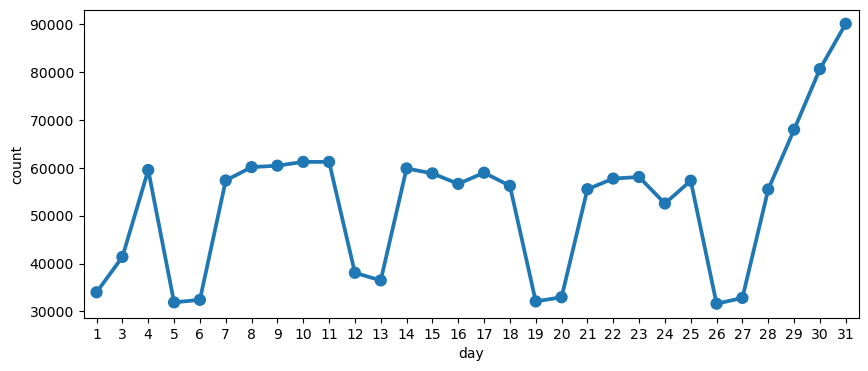

In [93]:
plt.figure(figsize=(10,4))
sns.pointplot(data=day_count, x="day", y="count" )
plt.show()

In [94]:
log_df.createOrReplaceTempView("NasaLogData")

In [115]:
day_host_request = spark.sql("""WITH CTE AS(
           SELECT 
               DAY(time) AS day, 
               COUNT(1) AS Number_of_request, 
               COUNT(Distinct(host)) AS Number_of_host
           FROM NasaLogData
           GROUP BY DAY(time)
           )
           SELECT 
               * , 
               round(Number_of_request/Number_of_host, 3) AS Avg_request_per_host
               FROM CTE
           """).toPandas()

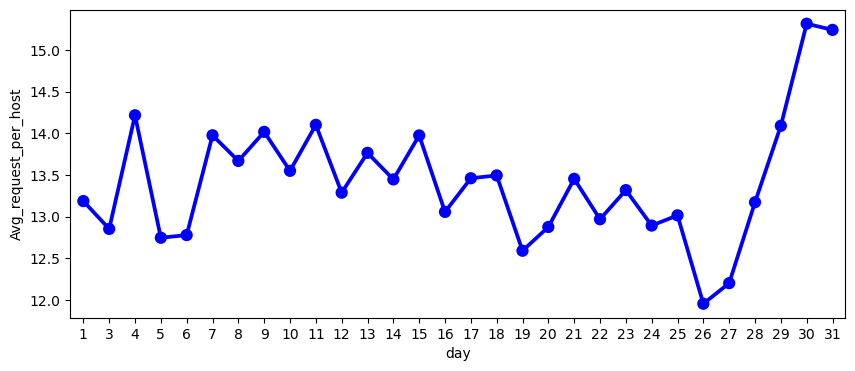

In [118]:
plt.figure(figsize=(10,4))
sns.pointplot(data=day_host_request, x="day", y="Avg_request_per_host" , color="b")
plt.show()

In [120]:
log_df.show()

+--------------------+------+--------------------+--------+------+------------+-------------------+
|                host|method|                 uri|protocol|status|content_size|               time|
+--------------------+------+--------------------+--------+------+------------+-------------------+
|   in24.inetnebr.com|   GET|/shuttle/missions...|HTTP/1.0|   200|        1839|1995-08-01 00:00:01|
|     uplherc.upl.com|   GET|                   /|HTTP/1.0|   304|           0|1995-08-01 00:00:07|
|     uplherc.upl.com|   GET|/images/ksclogo-m...|HTTP/1.0|   304|           0|1995-08-01 00:00:08|
|     uplherc.upl.com|   GET|/images/MOSAIC-lo...|HTTP/1.0|   304|           0|1995-08-01 00:00:08|
|     uplherc.upl.com|   GET|/images/USA-logos...|HTTP/1.0|   304|           0|1995-08-01 00:00:08|
|ix-esc-ca2-07.ix....|   GET|/images/launch-lo...|HTTP/1.0|   200|        1713|1995-08-01 00:00:09|
|     uplherc.upl.com|   GET|/images/WORLD-log...|HTTP/1.0|   304|           0|1995-08-01 00:00:10|


In [121]:
spark.stop()